<a href="https://colab.research.google.com/github/thamizhannal/eva5/blob/master/S8_Assignment_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RESNET18 Implementation

In [4]:
# Import pytorch packages
import torch
import torchvision
import torchvision.transforms as transforms

##### Install jedi modular library from pip
# Ref: https://test.pypi.org/project/eva5-jedi/0.0.2/

pip install -i https://test.pypi.org/simple/ eva5-jedi==0.0.1


In [11]:
pip install -i https://test.pypi.org/simple/ eva5-jedi==0.0.3

Looking in indexes: https://test.pypi.org/simple/
  Found existing installation: eva5-jedi 0.0.1
    Uninstalling eva5-jedi-0.0.1:
      Successfully uninstalled eva5-jedi-0.0.1


In [30]:

from com.tsai.jedi.batchnorm  import BatchNorm
from com.tsai.jedi.batchnorm  import GhostBatchNorm
from com.tsai.jedi.model import Net
from com.tsai.jedi.model import model_summary
from com.tsai.jedi.Engine_train_test import train
from com.tsai.jedi.Engine_train_test import test
from com.tsai.jedi.dataloader import train_loader, test_loader
from com.tsai.jedi import config

### Import ResNet18 from Library


In [23]:
from __future__ import print_function
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import sys


import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse

from com.tsai.jedi.models import *
#from com.tsai.jedi.utils import progress_bar

In [24]:
import os
rows, columns = 80, 80 #os.popen('stty size', 'r').read().split()

In [31]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
net = ResNet18()


In [32]:
print(model_summary(net, config.input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [35]:
accu = []
loss_test = []


model_ = Net(BN_flag=1).to(config.device)
optimizer = optim.SGD(model_.parameters(), lr=0.016, momentum=0.9)
scheduler = StepLR(optimizer, step_size=2, gamma=0.92)

valid_acc = []
loss_test_ = []
l1_regularization = [0, 0]
for epoch in range(1, 51):
    train(model_, config.device, train_loader, optimizer, epoch, l1_regularization)
    scheduler.step()
    valid_a, valid_l = test(model_, config.device, test_loader)
    # Appending to loss and accuracy lists
    valid_acc.append(valid_a)
    loss_test_.append(valid_l)

accu.append(valid_acc)
loss_test.append(loss_test_)

import pickle
with open("model_op_params.pickle","wb") as f:
    pickle.dump(accu, f)
    pickle.dump(loss_test, f)





  0%|          | 0/196 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/com/tsai/jedi/model.py:149: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
                                                                                      

Epoch: 1,LR: 0.016.
Train set: train Average loss: 1.6135, train_Accuracy: 15955/50000 (31.9100%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.5415, Accuracy: 4304/10000 (43.0400%)



Epoch: 2,LR: 0.016.
Train set: train Average loss: 1.2137, train_Accuracy: 24876/50000 (49.7520%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3146, Accuracy: 5381/10000 (53.8100%)



Epoch: 3,LR: 0.01472.
Train set: train Average loss: 0.9603, train_Accuracy: 28804/50000 (57.6080%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1893, Accuracy: 5772/10000 (57.7200%)



Epoch: 4,LR: 0.01472.
Train set: train Average loss: 1.1061, train_Accuracy: 30983/50000 (61.9660%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.1844, Accuracy: 5964/10000 (59.6400%)



Epoch: 5,LR: 0.013542400000000001.
Train set: train Average loss: 0.9249, train_Accuracy: 32360/50000 (64.7200%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9518, Accuracy: 6698/10000 (66.9800%)



Epoch: 6,LR: 0.013542400000000001.
Train set: train Average loss: 0.9581, train_Accuracy: 33270/50000 (66.5400%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9423, Accuracy: 6723/10000 (67.2300%)



Epoch: 7,LR: 0.012459008000000002.
Train set: train Average loss: 0.8772, train_Accuracy: 34365/50000 (68.7300%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.0408, Accuracy: 6554/10000 (65.5400%)



Epoch: 8,LR: 0.012459008000000002.
Train set: train Average loss: 0.7656, train_Accuracy: 35138/50000 (70.2760%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8780, Accuracy: 7047/10000 (70.4700%)



Epoch: 9,LR: 0.011462287360000002.
Train set: train Average loss: 0.5814, train_Accuracy: 36052/50000 (72.1040%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8520, Accuracy: 7133/10000 (71.3300%)



Epoch: 10,LR: 0.011462287360000002.
Train set: train Average loss: 0.6967, train_Accuracy: 36611/50000 (73.2220%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.8357, Accuracy: 7239/10000 (72.3900%)



Epoch: 11,LR: 0.010545304371200001.
Train set: train Average loss: 0.8395, train_Accuracy: 37156/50000 (74.3120%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7695, Accuracy: 7366/10000 (73.6600%)



Epoch: 12,LR: 0.010545304371200001.
Train set: train Average loss: 0.7791, train_Accuracy: 37464/50000 (74.9280%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6916, Accuracy: 7631/10000 (76.3100%)



Epoch: 13,LR: 0.009701680021504002.
Train set: train Average loss: 0.6740, train_Accuracy: 37896/50000 (75.7920%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6868, Accuracy: 7708/10000 (77.0800%)



Epoch: 14,LR: 0.009701680021504002.
Train set: train Average loss: 0.7303, train_Accuracy: 38319/50000 (76.6380%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7222, Accuracy: 7601/10000 (76.0100%)



Epoch: 15,LR: 0.008925545619783683.
Train set: train Average loss: 0.5504, train_Accuracy: 38591/50000 (77.1820%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6865, Accuracy: 7741/10000 (77.4100%)



Epoch: 16,LR: 0.008925545619783683.
Train set: train Average loss: 0.6754, train_Accuracy: 38917/50000 (77.8340%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.7156, Accuracy: 7631/10000 (76.3100%)



Epoch: 17,LR: 0.008211501970200989.
Train set: train Average loss: 0.5935, train_Accuracy: 39148/50000 (78.2960%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6409, Accuracy: 7883/10000 (78.8300%)



Epoch: 18,LR: 0.008211501970200989.
Train set: train Average loss: 0.5402, train_Accuracy: 39339/50000 (78.6780%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6657, Accuracy: 7799/10000 (77.9900%)



Epoch: 19,LR: 0.007554581812584909.
Train set: train Average loss: 0.4907, train_Accuracy: 39726/50000 (79.4520%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6281, Accuracy: 7905/10000 (79.0500%)



Epoch: 20,LR: 0.007554581812584909.
Train set: train Average loss: 0.5484, train_Accuracy: 39877/50000 (79.7540%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6750, Accuracy: 7844/10000 (78.4400%)



Epoch: 21,LR: 0.006950215267578117.
Train set: train Average loss: 0.6845, train_Accuracy: 40200/50000 (80.4000%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6103, Accuracy: 8006/10000 (80.0600%)



Epoch: 22,LR: 0.006950215267578117.
Train set: train Average loss: 0.5098, train_Accuracy: 40190/50000 (80.3800%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6235, Accuracy: 7978/10000 (79.7800%)



Epoch: 23,LR: 0.006394198046171868.
Train set: train Average loss: 0.5338, train_Accuracy: 40459/50000 (80.9180%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6070, Accuracy: 7976/10000 (79.7600%)



Epoch: 24,LR: 0.006394198046171868.
Train set: train Average loss: 0.7130, train_Accuracy: 40504/50000 (81.0080%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5764, Accuracy: 8056/10000 (80.5600%)



Epoch: 25,LR: 0.005882662202478119.
Train set: train Average loss: 0.6394, train_Accuracy: 40799/50000 (81.5980%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5915, Accuracy: 8088/10000 (80.8800%)



Epoch: 26,LR: 0.005882662202478119.
Train set: train Average loss: 0.6905, train_Accuracy: 40975/50000 (81.9500%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5929, Accuracy: 8077/10000 (80.7700%)



Epoch: 27,LR: 0.005412049226279869.
Train set: train Average loss: 0.5154, train_Accuracy: 41124/50000 (82.2480%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6064, Accuracy: 8046/10000 (80.4600%)



Epoch: 28,LR: 0.005412049226279869.
Train set: train Average loss: 0.5520, train_Accuracy: 41120/50000 (82.2400%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6403, Accuracy: 7949/10000 (79.4900%)



Epoch: 29,LR: 0.00497908528817748.
Train set: train Average loss: 0.6005, train_Accuracy: 41326/50000 (82.6520%)



  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.5814, Accuracy: 8149/10000 (81.4900%)



Epoch: 30,LR: 0.00497908528817748.
Train set: train Average loss: 0.6807, train_Accuracy: 41388/50000 (82.7760%)




Test set: Average loss: 0.5826, Accuracy: 8148/10000 (81.4800%)



### Validation Loss Plot

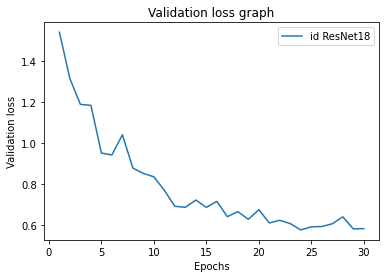

In [36]:
import matplotlib.pyplot as plt

x = [i for i in range(1,51)]
y = loss_test
Modelgraph = ['ResNet18']

plt.title("Validation loss graph")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
#plt.figure(figsize=(10,10))

for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
#plt.show()
plt.savefig('Validation loss graph')

#### Validation Accuracy Plot


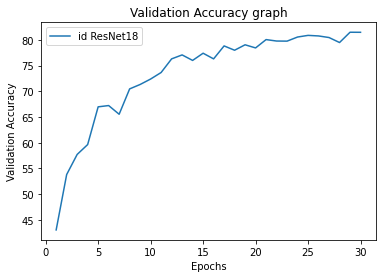

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

x = [i for i in range(1,51)]
y = accu
Modelgraph = ['ResNet18']


plt.title("Validation Accuracy graph")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")


for i in range(len(y)):
    plt.plot(x,y[i],label = 'id %s'%Modelgraph[i])

plt.legend()
plt.show()
plt.savefig('Validation Accuracy graph_')